In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.svm import SVC 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

white_wines = pd.read_csv("winequality-white.csv", sep=";")
white_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
white_wines['target'] = np.where(white_wines['quality']<=5,0,1)

In [4]:
target = white_wines['target']
target_names = ["bad quality","good quality"]

In [5]:
data = white_wines.drop(['quality', 'target'], axis=1)
feature_names = data.columns

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_scaler= MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
model=SVC(C = 10, kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear')

In [27]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7541519194119248
Testing Data Score: 0.7436734693877551


In [28]:
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

 bad quality       0.64      0.47      0.54       397
good quality       0.77      0.88      0.82       828

    accuracy                           0.74      1225
   macro avg       0.71      0.67      0.68      1225
weighted avg       0.73      0.74      0.73      1225



below code from applied machine learning course on linkedin

In [13]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [14]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.742 (+/-0.013) for {'C': 0.1, 'kernel': 'linear'}
0.662 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf'}
0.753 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.66 (+/-0.004) for {'C': 1, 'kernel': 'rbf'}
0.754 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.67 (+/-0.007) for {'C': 10, 'kernel': 'rbf'}


## Testing with best features and parameters

Feature: 0, Score: -0.46560
Feature: 1, Score: -5.66247
Feature: 2, Score: -0.56648
Feature: 3, Score: 3.83535
Feature: 4, Score: -0.33455
Feature: 5, Score: 1.49414
Feature: 6, Score: -0.75183
Feature: 7, Score: -0.15904
Feature: 8, Score: 0.72980
Feature: 9, Score: 0.93091
Feature: 10, Score: 4.49378


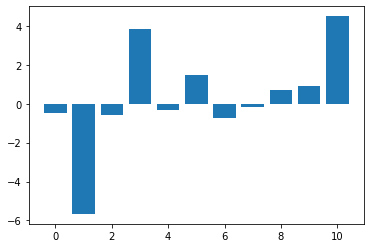

In [15]:

from matplotlib import pyplot

# # get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [16]:
list(white_wines.columns.values)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'target']

In [17]:
# using 5 parameters we have determined may result with better results:
target2 = white_wines['target']
target_names2 = ["bad quality","good quality"]

In [18]:
data2 = white_wines.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'quality', 'target'], axis=1)
feature_names2 = data2.columns

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, random_state=42)

In [20]:
X_scaler2= MinMaxScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [29]:
model2=SVC(C =1, kernel='linear')
model2.fit(X_train_scaled2, y_train2)

SVC(C=1, kernel='linear')

In [30]:
print(f"Training Data Score: {model2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {model2.score(X_test_scaled2, y_test2)}")

Training Data Score: 0.7048734004900626
Testing Data Score: 0.6987755102040817


In [31]:
predictions2 = model2.predict(X_test_scaled2)
print(classification_report(y_test2, predictions2,
                            target_names=target_names))

              precision    recall  f1-score   support

 bad quality       0.55      0.39      0.45       397
good quality       0.74      0.85      0.79       828

    accuracy                           0.70      1225
   macro avg       0.65      0.62      0.62      1225
weighted avg       0.68      0.70      0.68      1225



In [24]:
svc2 = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv2 = GridSearchCV(svc, parameters, cv=5)
cv2.fit(X_train2, y_train2)

print_results(cv2)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.707 (+/-0.016) for {'C': 0.1, 'kernel': 'linear'}
0.662 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf'}
0.71 (+/-0.017) for {'C': 1, 'kernel': 'linear'}
0.689 (+/-0.008) for {'C': 1, 'kernel': 'rbf'}
0.706 (+/-0.016) for {'C': 10, 'kernel': 'linear'}
0.698 (+/-0.016) for {'C': 10, 'kernel': 'rbf'}


In [25]:
cv2.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
# svc3 = SVC(C=10)
# parameters = {
#     'kernel': ['linear', 'rbf'],
#     'C': [0.1, 1, 10]
# }

# cv2 = GridSearchCV(svc, parameters, cv=5)
# cv2.fit(X_train2, y_train2)

# print_results(cv2)